In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn import preprocessing
from sklearn.utils.multiclass import type_of_target
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [2]:
str=pd.read_csv("SalaryData_Train.csv")

In [3]:
str.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [4]:
ste=pd.read_csv("SalaryData_Test.csv")

In [5]:
ste.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,34,Private,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K


# EDA

In [6]:
str.isna().sum()

age              0
workclass        0
education        0
educationno      0
maritalstatus    0
occupation       0
relationship     0
race             0
sex              0
capitalgain      0
capitalloss      0
hoursperweek     0
native           0
Salary           0
dtype: int64

In [7]:
ste.isna().sum()

age              0
workclass        0
education        0
educationno      0
maritalstatus    0
occupation       0
relationship     0
race             0
sex              0
capitalgain      0
capitalloss      0
hoursperweek     0
native           0
Salary           0
dtype: int64

In [8]:
str.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30161 entries, 0 to 30160
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   age            30161 non-null  int64 
 1   workclass      30161 non-null  object
 2   education      30161 non-null  object
 3   educationno    30161 non-null  int64 
 4   maritalstatus  30161 non-null  object
 5   occupation     30161 non-null  object
 6   relationship   30161 non-null  object
 7   race           30161 non-null  object
 8   sex            30161 non-null  object
 9   capitalgain    30161 non-null  int64 
 10  capitalloss    30161 non-null  int64 
 11  hoursperweek   30161 non-null  int64 
 12  native         30161 non-null  object
 13  Salary         30161 non-null  object
dtypes: int64(5), object(9)
memory usage: 3.2+ MB


In [9]:
ste.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15060 entries, 0 to 15059
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   age            15060 non-null  int64 
 1   workclass      15060 non-null  object
 2   education      15060 non-null  object
 3   educationno    15060 non-null  int64 
 4   maritalstatus  15060 non-null  object
 5   occupation     15060 non-null  object
 6   relationship   15060 non-null  object
 7   race           15060 non-null  object
 8   sex            15060 non-null  object
 9   capitalgain    15060 non-null  int64 
 10  capitalloss    15060 non-null  int64 
 11  hoursperweek   15060 non-null  int64 
 12  native         15060 non-null  object
 13  Salary         15060 non-null  object
dtypes: int64(5), object(9)
memory usage: 1.6+ MB


# Before dropping the duplicates in data

In [10]:
print('before duplicates dropped',str.shape)
print('before duplicates droppped',ste.shape)

before duplicates dropped (30161, 14)
before duplicates droppped (15060, 14)


# After dropping the duplicates in data

In [11]:
str.drop_duplicates(keep=False,inplace=True)
ste.drop_duplicates(keep=False,inplace=True)

In [12]:
print('after duplicates dropped',str.shape)
print('after duplicates droppped',ste.shape)

after duplicates dropped (24943, 14)
after duplicates droppped (13450, 14)


# Dropping the "native" column

In [13]:
str.drop('native',axis=1,inplace=True)
ste.drop('native',axis=1,inplace=True)

In [14]:
str.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,Salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,<=50K


In [15]:
ste.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,Salary
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,<=50K
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,<=50K
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,>50K
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,>50K
4,34,Private,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,<=50K


# Label Encoding the categorical columns in both datasets

In [16]:
mj=['workclass','education','maritalstatus','occupation','relationship','race','sex','Salary']

LE=preprocessing.LabelEncoder()
for col in mj:
    
    str[col]=LE.fit_transform(str[col])
    ste[col]=LE.fit_transform(ste[col])
    print(LE.classes_)

[' Federal-gov' ' Local-gov' ' Private' ' Self-emp-inc'
 ' Self-emp-not-inc' ' State-gov' ' Without-pay']
[' 10th' ' 11th' ' 12th' ' 1st-4th' ' 5th-6th' ' 7th-8th' ' 9th'
 ' Assoc-acdm' ' Assoc-voc' ' Bachelors' ' Doctorate' ' HS-grad'
 ' Masters' ' Preschool' ' Prof-school' ' Some-college']
[' Divorced' ' Married-AF-spouse' ' Married-civ-spouse'
 ' Married-spouse-absent' ' Never-married' ' Separated' ' Widowed']
[' Adm-clerical' ' Armed-Forces' ' Craft-repair' ' Exec-managerial'
 ' Farming-fishing' ' Handlers-cleaners' ' Machine-op-inspct'
 ' Other-service' ' Priv-house-serv' ' Prof-specialty' ' Protective-serv'
 ' Sales' ' Tech-support' ' Transport-moving']
[' Husband' ' Not-in-family' ' Other-relative' ' Own-child' ' Unmarried'
 ' Wife']
[' Amer-Indian-Eskimo' ' Asian-Pac-Islander' ' Black' ' Other' ' White']
[' Female' ' Male']
[' <=50K' ' >50K']


In [17]:
str.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,Salary
0,39,5,9,13,4,0,1,4,1,2174,0,40,0
1,50,4,9,13,2,3,0,4,1,0,0,13,0
2,38,2,11,9,0,5,1,4,1,0,0,40,0
3,53,2,1,7,2,5,0,2,1,0,0,40,0
4,28,2,9,13,2,9,5,2,0,0,0,40,0


In [18]:
ste.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,Salary
0,25,2,1,7,4,6,3,2,1,0,0,40,0
1,38,2,11,9,2,4,0,4,1,0,0,50,0
2,28,1,7,12,2,10,0,4,1,0,0,40,1
3,44,2,15,10,2,6,0,2,1,7688,0,40,1
4,34,2,0,6,4,7,1,4,1,0,0,30,0


In [19]:
str['Salary'].value_counts()

0    18486
1     6457
Name: Salary, dtype: int64

In [20]:
ste['Salary'].value_counts()

0    10093
1     3357
Name: Salary, dtype: int64

In [21]:
print('% of data labelled as 0:',((str['Salary']==0).sum()/len(str)*100))
print('% of data labelled as 0:',((str['Salary']==1).sum()/len(str)*100))

% of data labelled as 0: 74.1129775889027
% of data labelled as 0: 25.887022411097306


# Features selection on train dataset using ExtraTreesClassifier

In [22]:
x=str.iloc[:,:-1]
y=str.iloc[:,-1]

In [23]:
x.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek
0,39,5,9,13,4,0,1,4,1,2174,0,40
1,50,4,9,13,2,3,0,4,1,0,0,13
2,38,2,11,9,0,5,1,4,1,0,0,40
3,53,2,1,7,2,5,0,2,1,0,0,40
4,28,2,9,13,2,9,5,2,0,0,0,40


In [24]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: Salary, dtype: int32

In [25]:
model=ExtraTreesClassifier(n_estimators=12)
model.fit(x,y)
print(model.feature_importances_)

[0.22918501 0.05465372 0.03485532 0.08696848 0.09204723 0.09502036
 0.07853218 0.02073532 0.03115481 0.10601758 0.03744724 0.13338274]


In [26]:
str.columns

Index(['age', 'workclass', 'education', 'educationno', 'maritalstatus',
       'occupation', 'relationship', 'race', 'sex', 'capitalgain',
       'capitalloss', 'hoursperweek', 'Salary'],
      dtype='object')

In [27]:
mj1=['age', 'workclass', 'education', 'educationno', 'maritalstatus',
       'occupation', 'relationship', 'race', 'sex', 'capitalgain',
       'capitalloss', 'hoursperweek']
imp=pd.Series(model.feature_importances_,index=mj1).sort_values(ascending=False)
imp

age              0.229185
hoursperweek     0.133383
capitalgain      0.106018
occupation       0.095020
maritalstatus    0.092047
educationno      0.086968
relationship     0.078532
workclass        0.054654
capitalloss      0.037447
education        0.034855
sex              0.031155
race             0.020735
dtype: float64

Text(0, 0.5, 'Features')

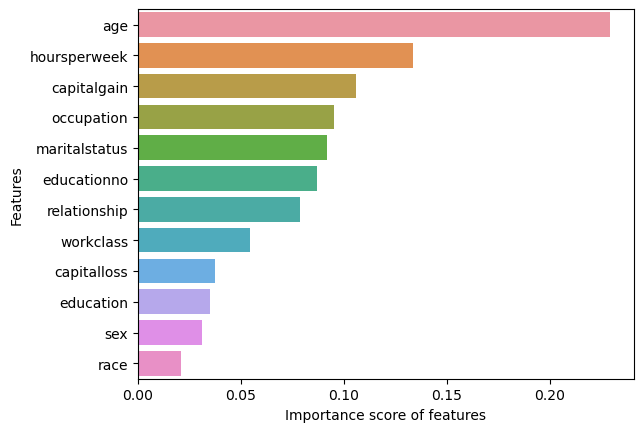

In [28]:
sns.barplot(x=imp,y=imp.index)
plt.xlabel("Importance score of features")
plt.ylabel("Features")

In [29]:
str.drop(['workclass','education','capitalloss','sex','race'],axis=1,inplace=True)

In [30]:
str

,age,educationno,maritalstatus,occupation,relationship,capitalgain,hoursperweek,Salary
0,39,13,4,0,1,2174,40,0
1,50,13,2,3,0,0,13,0
2,38,9,0,5,1,0,40,0
3,53,7,2,5,0,0,40,0
4,28,13,2,9,5,0,40,0
...,...,...,...,...,...,...,...,...
30154,53,14,2,3,0,0,40,1
30155,22,10,4,10,1,0,40,0
30156,27,12,2,12,5,0,38,0
30158,58,9,6,0,4,0,40,0


In [31]:
ste.drop(['workclass','education','capitalloss','sex','race'],axis=1,inplace=True)

In [32]:
ste

,age,educationno,maritalstatus,occupation,relationship,capitalgain,hoursperweek,Salary
0,25,7,4,6,3,0,40,0
1,38,9,2,4,0,0,50,0
2,28,12,2,10,0,0,40,1
3,44,10,2,6,0,7688,40,1
4,34,6,4,7,1,0,30,0
...,...,...,...,...,...,...,...,...
15055,33,13,4,9,3,0,40,0
15056,39,13,0,9,1,0,36,0
15057,38,13,2,9,0,0,50,0
15058,44,13,0,0,3,5455,40,0


In [33]:
str[['age','capitalgain','hoursperweek']].describe()

,age,capitalgain,hoursperweek
count,24943.000000,24943.000000,24943.000000
mean,39.433909,1302.317724,41.283045
std,13.218143,8071.604978,12.592211
min,17.000000,0.000000,1.000000
25%,29.000000,0.000000,40.000000
50%,38.000000,0.000000,40.000000
75%,48.000000,0.000000,46.000000
max,90.000000,99999.000000,99.000000


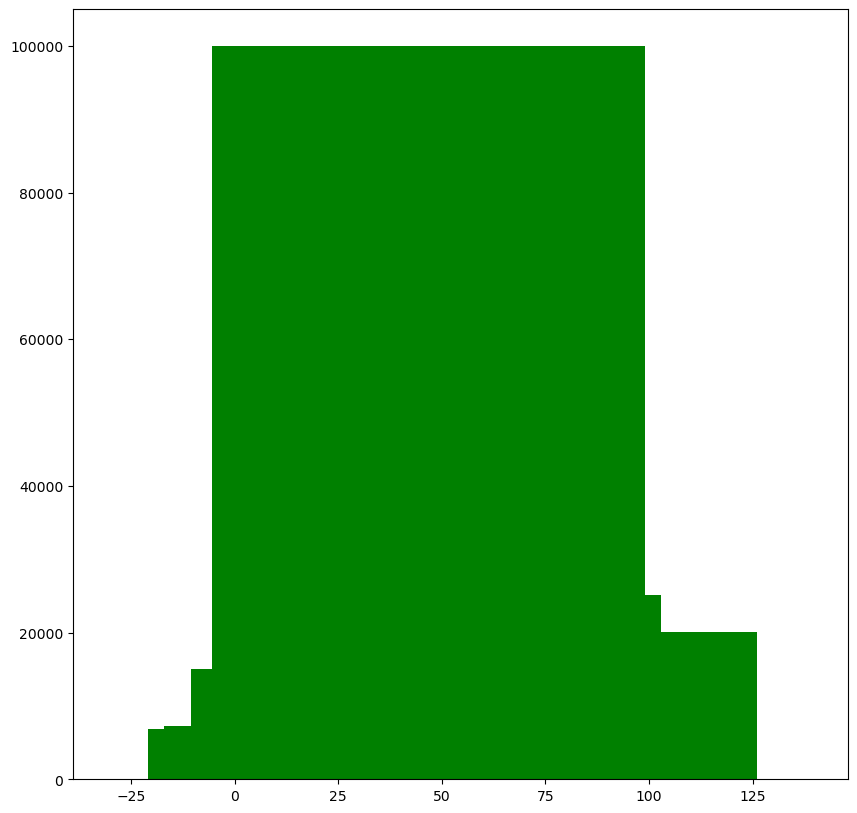

In [34]:
plt.figure(figsize=(10,10))
plt.bar(str['age'],str['capitalgain'],str['hoursperweek'],color='green')
plt.show()

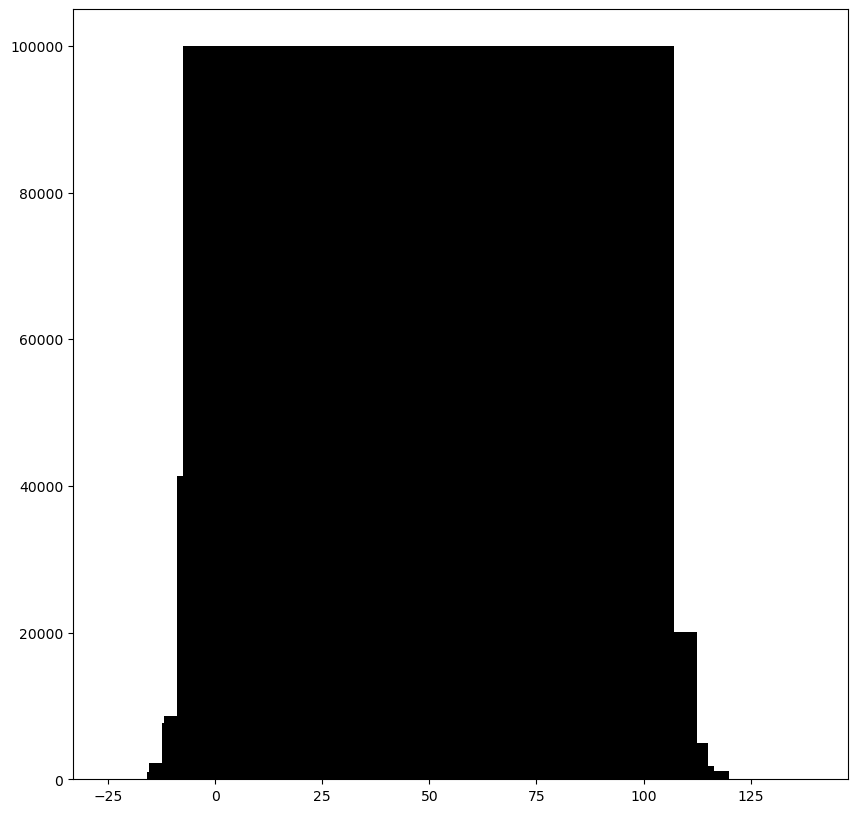

In [35]:
plt.figure(figsize=(10,10))
plt.bar(ste['age'],ste['capitalgain'],ste['hoursperweek'],color='black')
plt.show()

In [36]:
str[['age','capitalgain','hoursperweek']].describe()

,age,capitalgain,hoursperweek
count,24943.000000,24943.000000,24943.000000
mean,39.433909,1302.317724,41.283045
std,13.218143,8071.604978,12.592211
min,17.000000,0.000000,1.000000
25%,29.000000,0.000000,40.000000
50%,38.000000,0.000000,40.000000
75%,48.000000,0.000000,46.000000
max,90.000000,99999.000000,99.000000


In [37]:
ste[['age','capitalgain','hoursperweek']].describe()

,age,capitalgain,hoursperweek
count,13450.000000,13450.000000,13450.000000
mean,39.458364,1237.306468,41.158439
std,13.455382,8050.662571,12.417740
min,17.000000,0.000000,1.000000
25%,29.000000,0.000000,40.000000
50%,38.000000,0.000000,40.000000
75%,48.000000,0.000000,45.000000
max,90.000000,99999.000000,99.000000


# in this step we perform a fitting the train data and Transforming thr train data and Transforming thr test data

In [38]:
mj3=StandardScaler()
mj3.fit(ste[['age','capitalgain','hoursperweek']])

str[['age','capitalgain','hoursperweek']]=mj3.transform(str[['age','capitalgain','hoursperweek']])
ste[['age','capitalgain','hoursperweek']]=mj3.transform(ste[['age','capitalgain','hoursperweek']])

In [39]:
str.head()

,age,educationno,maritalstatus,occupation,relationship,capitalgain,hoursperweek,Salary
0,-0.034067,13,4,0,1,0.116354,-0.093292,0
1,0.783480,13,2,3,0,-0.153696,-2.267682,0
2,-0.108389,9,0,5,1,-0.153696,-0.093292,0
3,1.006448,7,2,5,0,-0.153696,-0.093292,0
4,-0.851614,13,2,9,5,-0.153696,-0.093292,0


In [40]:
ste.head()

,age,educationno,maritalstatus,occupation,relationship,capitalgain,hoursperweek,Salary
0,-1.074581,7,4,6,3,-0.153696,-0.093292,0
1,-0.108389,9,2,4,0,-0.153696,0.712037,0
2,-0.851614,12,2,10,0,-0.153696,-0.093292,1
3,0.337546,10,2,6,0,0.801292,-0.093292,1
4,-0.405679,6,4,7,1,-0.153696,-0.898622,0


In [41]:
str['Salary'].value_counts()

0    18486
1     6457
Name: Salary, dtype: int64

In [42]:
ste['Salary'].value_counts()

0    10093
1     3357
Name: Salary, dtype: int64

# Building a naive bayes model

In [43]:
x_train=str.iloc[:,:-1]
y_train=str.iloc[:,-1]

In [44]:
x_test=str.iloc[:,:-1]
y_test=str.iloc[:,-1]

In [45]:
x_test

,age,educationno,maritalstatus,occupation,relationship,capitalgain,hoursperweek
0,-0.034067,13,4,0,1,0.116354,-0.093292
1,0.783480,13,2,3,0,-0.153696,-2.267682
2,-0.108389,9,0,5,1,-0.153696,-0.093292
3,1.006448,7,2,5,0,-0.153696,-0.093292
4,-0.851614,13,2,9,5,-0.153696,-0.093292
...,...,...,...,...,...,...,...
30154,1.006448,14,2,3,0,-0.153696,-0.093292
30155,-1.297549,10,4,10,1,-0.153696,-0.093292
30156,-0.925936,12,2,12,5,-0.153696,-0.254358
30158,1.378060,9,6,0,4,-0.153696,-0.093292


In [46]:
y_train

0        0
1        0
2        0
3        0
4        0
        ..
30154    1
30155    0
30156    0
30158    0
30160    1
Name: Salary, Length: 24943, dtype: int32

In [47]:
gs=GaussianNB()
gs.fit(x_train,y_train)

GaussianNB()

In [48]:
y_pred=gs.predict(x_test)

In [49]:
y_pred

array([0, 0, 0, ..., 0, 0, 1])

In [50]:
model3=confusion_matrix(y_test,y_pred)

In [51]:
model3

array([[17982,   504],
       [ 4874,  1583]], dtype=int64)

Text(20.72222222222222, 0.5, 'True class')

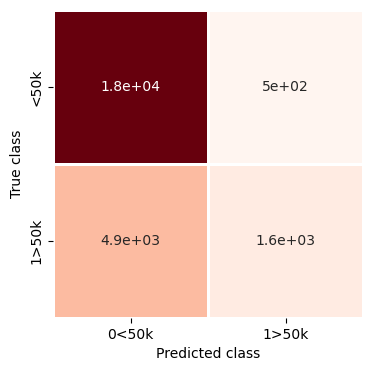

In [52]:
fig,ss=plt.subplots(1,1,figsize=(4,4),dpi=100)
xlabels=['0<50k','1>50k']
ylabels=['<50k','1>50k']
sns.heatmap(model3,annot=True,cbar=None,cmap="Reds",xticklabels=xlabels,yticklabels=ylabels,linewidth=1,linecolor='white')
ss.set_xlabel('Predicted class')
ss.set_ylabel('True class')

In [54]:
final=['0,50;','1>50k']
print(classification_report(y_test,y_pred,target_names=final))

              precision    recall  f1-score   support

       0,50;       0.79      0.97      0.87     18486
       1>50k       0.76      0.25      0.37      6457

    accuracy                           0.78     24943
   macro avg       0.77      0.61      0.62     24943
weighted avg       0.78      0.78      0.74     24943

